# Proyecto 1 | Inteligencia Artificial
## Integrantes:
- **César Jiménez Salazar** - 2021052709
- **Maynor Martínez Hernández** - 2021052792
- **Fernanda Murillo Mena** - 2021077803

## Descripción
Este proyecto tiene como objetivo principal aplicar diversas técnicas de clasificación de datos aplicados para dos conjuntos de datos, esto permite explorar diversas herramientas relacionadas al Machine Learning, y contribuir al desarrollo del conocimiento a partir de la investigación. Se utilizarán los modelos KNN, regresión lineal y redes neuronales con el fin de analizar ambos conjuntos de datos.

## Conjunto de datos
1. **Pima Indians Diabetes Database**
    - **URL:** https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database
    - **Descripción:** Este conjunto de datos proviene del Instituto Nacional de Diabetes y Enfermedades Digestivas y Renales. El objetivo del conjunto de datos es predecir de forma diagnóstica si un paciente tiene diabetes o no, basándose en ciertas mediciones de diagnóstico incluidas en el conjunto de datos. Se impusieron varias restricciones a la selección de estas instancias de una base de datos más grande. En particular, todos los pacientes aquí son mujeres de al menos 21 años de edad de ascendencia india Pima.
2. **Heart Failure Prediction Dataset** <br>
   Este fue el dataset elegido por el equipo de trabajo debido a que fue el dataset relacionado a salud con una cantidad de features adecuada y el más parecido al primer dataset dado por el profesor en cuanto al tamaño de samples. 
    - **URL:** https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction
    - **Descripción:** Las enfermedades cardiovasculares (ECV) son la principal causa de muerte a nivel mundial y se estima que cobran 17,9 millones de vidas cada año, lo que representa el 31% de todas las muertes en todo el mundo. Cuatro de cada cinco muertes por ECV se deben a ataques cardíacos y accidentes cerebrovasculares, y un tercio de estas muertes ocurren prematuramente en mujeres menores de 70 años. La insuficiencia cardíaca es un evento común causado por enfermedades cardiovasculares y este conjunto de datos contiene 11 características que pueden usarse para predecir una posible enfermedad cardíaca. Las mujeres con enfermedades cardiovasculares o que tienen un alto riesgo cardiovascular (debido a la presencia de uno o más factores de riesgo como hipertensión, diabetes, hiperlipidemia o enfermedades ya establecidas) necesitan una detección y un tratamiento precoz en el que un modelo de aprendizaje automático puede ser de gran ayuda.

## Pima Indians Diabetes Database
Inicialmente, se procede con la exploración y el preprocesamiento de datos para el conjunto de datos *Pima Indians Diabetes Database*. Dicho dataset fue dado por el profesor del curso.

### Analisis Exploratorio de Datos
Primero, se importan las librerías necesarias para el análisis exploratorio de datos.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Ahora, se procede a cargar los datos del dataset. Del mismo modo, se comienza a explorar el conjunto de datos para obtener la información básica importante. Para lograr esto, se visualizan algunos datos para poder ver las columnas y los datos correspondientes, se obtienen las estadísticas básicas, la cantidad de datos faltantes y la correlación entre columnas.

In [2]:
# Load dataset
df_diabetes = pd.read_csv('diabetes.csv')

# Display 20 rows 
print(df_diabetes.head(20))

    Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0             6      148             72             35        0  33.6   
1             1       85             66             29        0  26.6   
2             8      183             64              0        0  23.3   
3             1       89             66             23       94  28.1   
4             0      137             40             35      168  43.1   
5             5      116             74              0        0  25.6   
6             3       78             50             32       88  31.0   
7            10      115              0              0        0  35.3   
8             2      197             70             45      543  30.5   
9             8      125             96              0        0   0.0   
10            4      110             92              0        0  37.6   
11           10      168             74              0        0  38.0   
12           10      139             80            

In [3]:
# Get basic statistics 
print(df_diabetes.describe())

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

In [4]:
# Number of missing values in each column
print(df_diabetes.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [5]:
# Correlation between columns
print(df_diabetes.corr())

                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose                   0.331357  0.221

In [6]:
df_diabetes.count()

Pregnancies                 768
Glucose                     768
BloodPressure               768
SkinThickness               768
Insulin                     768
BMI                         768
DiabetesPedigreeFunction    768
Age                         768
Outcome                     768
dtype: int64

Con esta información, se obtiene que el dataset posee 9 columnas de las cuales *pregnancies* tiene la posibilidad de tener un 0 sin que sea un problema para el análisis, esto porque una mujer puede tener 0 embarazos. Además, la columna *outcome* tiene un valor binario por lo que también puede tener un valor 0. Se evidencia que el dataset tiene una cantidad de 768 datos y que no hay datos nulos o faltantes.



#### **Eliminar filas duplicadas**


Ahora, se procede a revisar si hay filas duplicadas para eliminarlas. Del mismo modo, tras el análisis anterior se pudo notar que algunas columnas (además de las permitidas) poseen valores en 0 por lo que es de suma importancia corregirlo para el análisis del dataset con los modelos más adelante. 


In [7]:
# Check for duplicate rows and remove them
print(df_diabetes.duplicated().sum())
df_diabetes = df_diabetes.drop_duplicates()

0


#### **Imputación de datos**
Una técnica utilizada para tratar con valores faltantes en un conjunto de datos es la **_imputación de datos_**. El objetivo de la imputación es reemplazar los datos faltantes con valores sustitutos para permitir el análisis sin descartar *features* por la falta de algunos valores. Usar la media como valor de imputación es apropiado porque representa el punto central de la distribución y minimiza la distorsión.

Por este motivo, se decidió recurrir a la *imputación de datos por la media*, es decir, reemplazar los valores en 0 encontrados en todas las columnas excepto *pregnancies* y *outcome* por la media correspondiente a la columna.

In [8]:
# Check for missing values for 0 in columns except for the 'Pregnancies' column and 'Outcome' column and replace them with the mean of the respective column
df_diabetes['Glucose'] = df_diabetes['Glucose'].replace(0, np.nan)
df_diabetes['BloodPressure'] = df_diabetes['BloodPressure'].replace(0, np.nan)
df_diabetes['SkinThickness'] = df_diabetes['SkinThickness'].replace(0, np.nan)
df_diabetes['Insulin'] = df_diabetes['Insulin'].replace(0, np.nan)
df_diabetes['BMI'] = df_diabetes['BMI'].replace(0, np.nan)
df_diabetes['DiabetesPedigreeFunction'] = df_diabetes['DiabetesPedigreeFunction'].replace(0, np.nan)
df_diabetes['Age'] = df_diabetes['Age'].replace(0, np.nan)
df_diabetes.fillna(df_diabetes.mean(), inplace=True)

- Debido a que no habían filas duplicadas, el resultado fue cero. 
- Tras el cambio del dataset realizado con la imputación por la media, se puede proceder a analizar mediante el uso de diversos diagramas para ver el comportamiento del dataset de manera visual.

El siguiente histograma permitirá ver el rango de edades que se encuentran dentro del conjunto de datos, esto con el fin de obtener una idea general de los datos obtenidos.

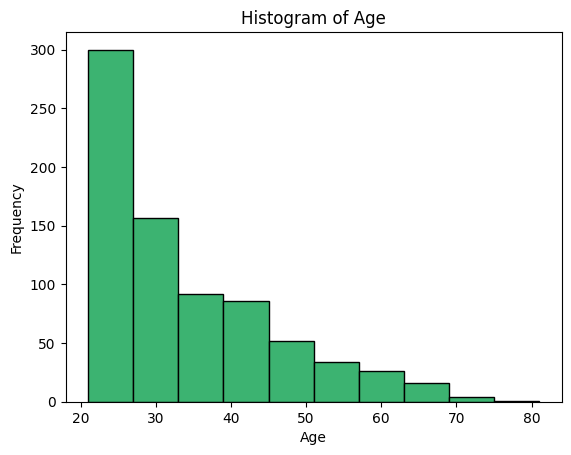

In [9]:
# Histogram of the Age column
plt.hist(df_diabetes['Age'], bins=10, color='#3CB371', edgecolor='black')
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

Con la información obtenida se evidencia que la mayoría de mujeres se encuentra en un rango de edad entre 20 y 30 años. 

#### **Visualización de los datos**
Ahora, se procede con un análisis un poco más profundo. Se desea observar el porcentaje y la cantidad de mujeres diabéticas en comparación con las mujeres que no lo padecen. Dónde se provará diferentes casos para el dataset:
1. Balanceo
2. Gráficos de Barra
3. Gráficos de dispersion 

- **Gráficos para mostrar el Balanceo de Datos**

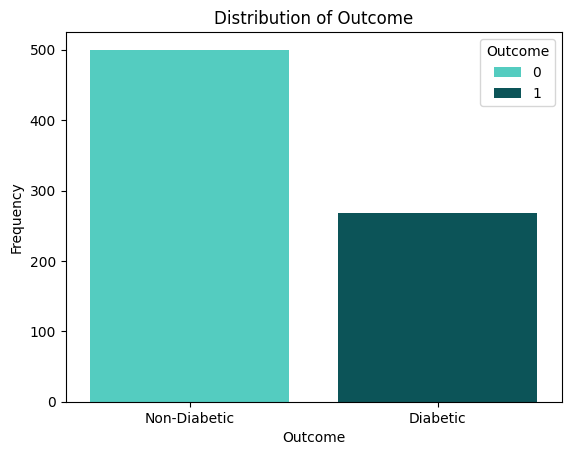

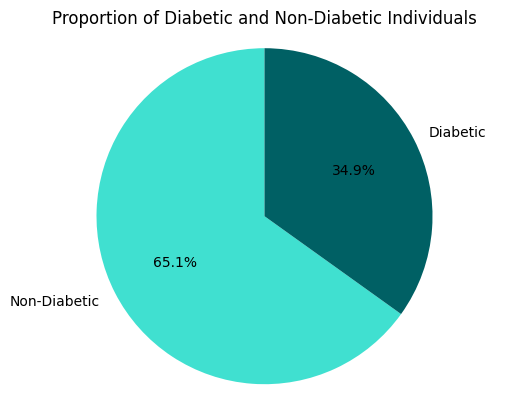

In [10]:
# Distribution of the Outcome column for people with diabetes and people without diabetes
palette_colors = {0: "#40E0D0", 1: "#006064"}  
sns.countplot(x='Outcome', data=df_diabetes, hue="Outcome", palette=palette_colors)
plt.title('Distribution of Outcome')
plt.xlabel('Outcome')
plt.ylabel('Frequency')
plt.xticks([0, 1], ['Non-Diabetic', 'Diabetic'])
plt.show()

# Pie chart to visualize the proportion of diabetic and non-diabetic individuals
labels = ['Non-Diabetic', 'Diabetic']
sizes = df_diabetes['Outcome'].value_counts()
colors = ['#40E0D0', '#006064']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Proportion of Diabetic and Non-Diabetic Individuals')
plt.axis('equal')
plt.show()

Con base en los resultados obtenidos, se puede ver que existe una mayor cantidad de mujeres que no padecen de diabetes en el conjunto de datos con un 65.1% de los 768 datos existentes. A demás, es importante ver que en el *pie chart* el dataset no está balanceado.

- **Gráficos de barra**

Para obtener una idea de como están relacionados los *features* con el hecho de que una mujer sea diabética o no, se pretende comparar cada columna con la columna de *outcome*. Para agilizar este proceso, primero se creó una función que recibe el dataset, el arreglo de *features* con la cual se pretende comparar y la columna con la que se va a comparar.

In [11]:
def plot_stacked_grid_histogram(df, features, split_column):
    num_features = len(features)
    colors = ['#40E0D0', '#006064']
    
    num_rows = (num_features + 2) // 3  
    
    fig, axes = plt.subplots(num_rows, 3, figsize=(15, 5 * num_rows)) 

    if num_rows > 1:
        axes = axes.flatten()
    
    for i, feature in enumerate(features):
        ax = axes[i] if num_rows > 1 else axes
        if feature in df.columns and split_column in df.columns:
            ax.hist([df[df[split_column] == 0][feature], df[df[split_column] == 1][feature]], 
                    bins=10, stacked=True, color=colors, 
                    label=[f'Not {split_column}', f'{split_column}'], edgecolor='black')
            ax.set_title(f'{feature} by {split_column}')
            ax.set_xlabel(feature)
            ax.set_ylabel('Count')
            ax.legend()
        else:
            print(f"The feature '{feature}' or the split column '{split_column}' is not in the DataFrame.")
    for i in range(num_features, num_rows * 3):
        fig.delaxes(axes.flatten()[i])

    plt.tight_layout()  
    plt.show()

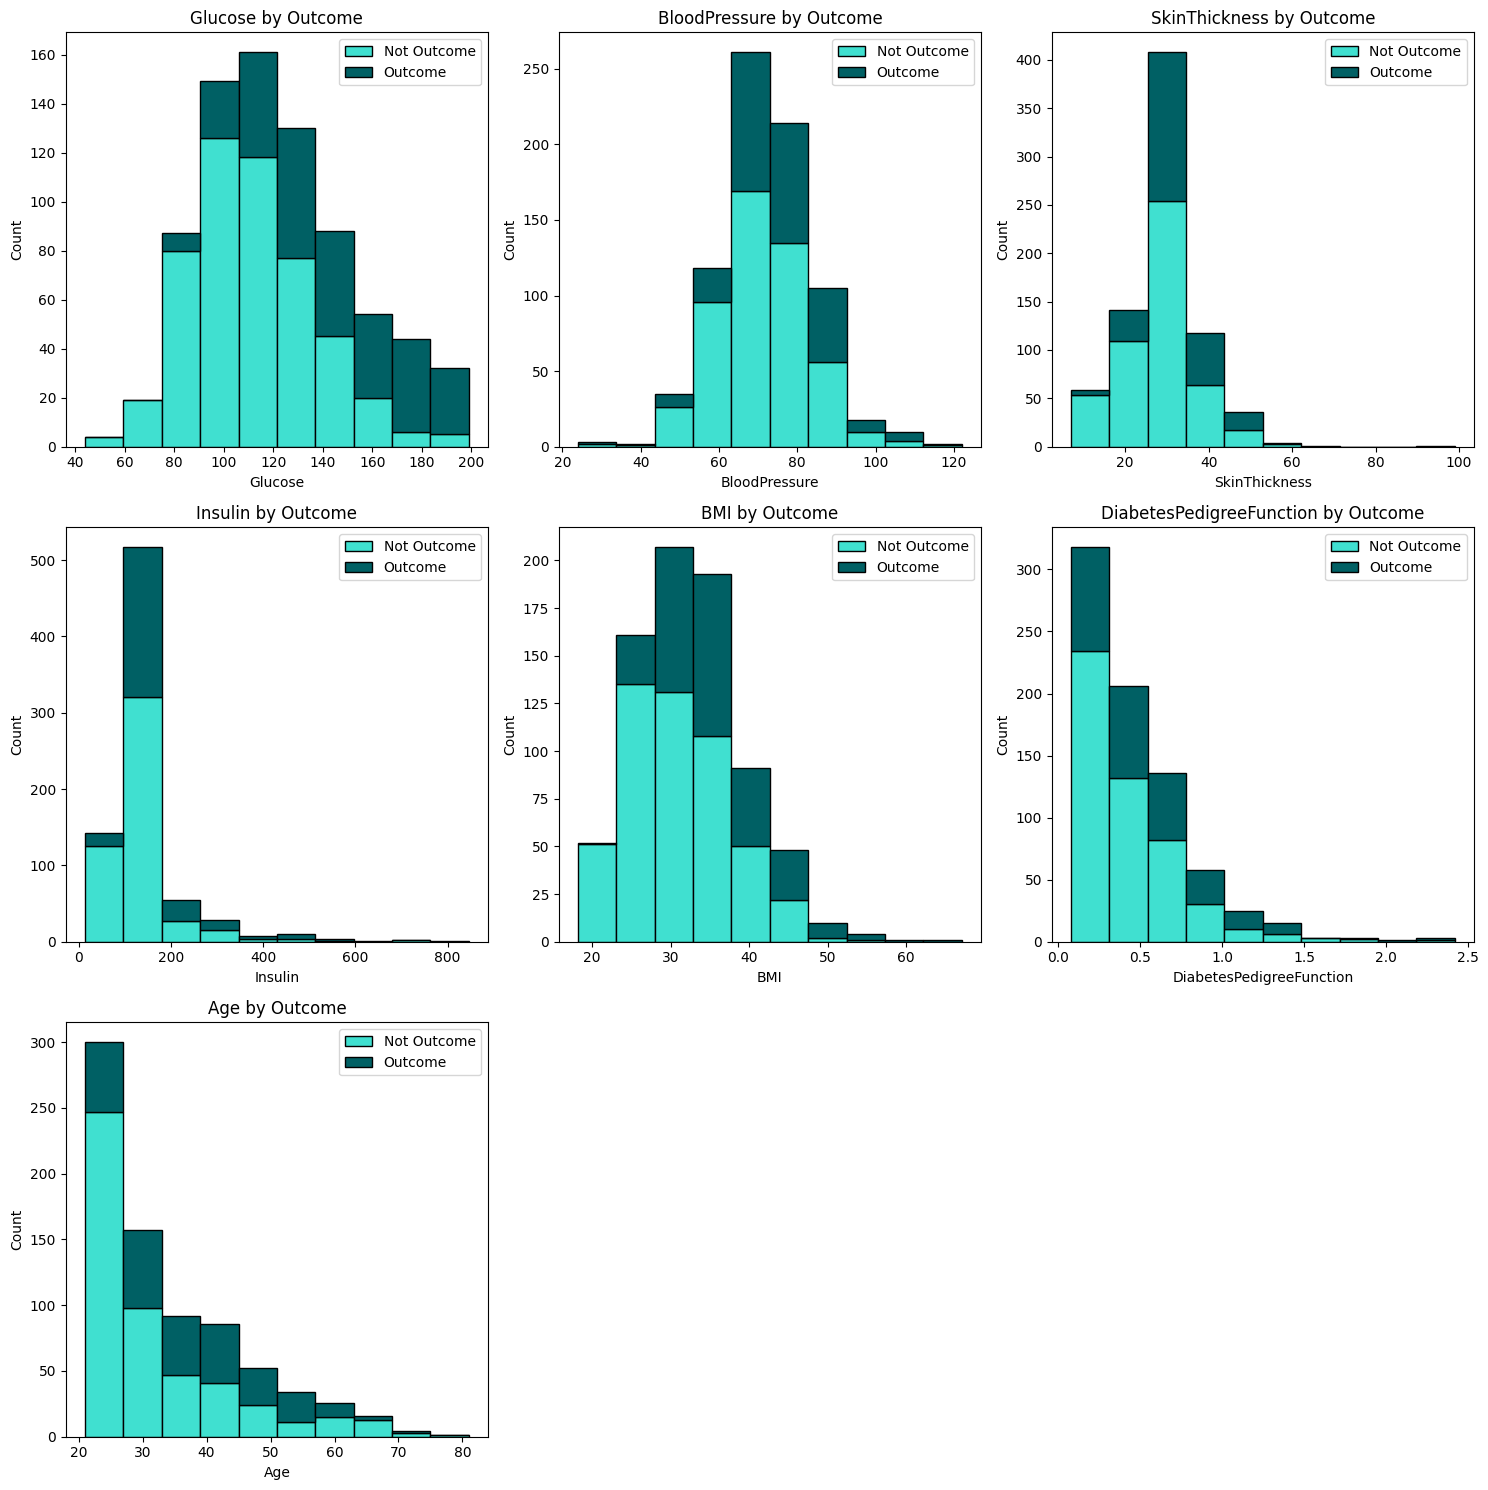

In [12]:
# Call the function to plot the stacked histograms
plot_stacked_grid_histogram(df_diabetes, ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'], 'Outcome')

Con base en los histogramas obtenidos, es fácil de observar que en su mayoría para cualquier feature donde están los valores altos es donde hay más concentración de mujeres diabéticas. Es importante ver que no es tan significativo en algunos casos como lo es la presión sanguínea.

- **Gráficos de dispersión**

Ahora, para observar que tan relacionada está la edad con estos datos vistos anteriormente, se pretende evaluar de manera similar cada columna en comparación de la edad para ver las diabéticas y las no diabéticas. Para este caso se recurrió al uso de diagramas de dispersión. Se seguió una técnica para agilizar el proceso similar al anterior donde se crea una función que luego se llama con el nombre del *dataset*, el arreglo de *features* a evaluar, las columnas a comparar y los *labels*.


In [13]:
def scatter_plots_grid_by_feature_and_split(df, features, split_column, y_column, labels):
    num_features = len(features)
    colors = ['#40E0D0', '#006064']

    num_rows = (num_features + 2) // 3  

    fig, axes = plt.subplots(num_rows, 3, figsize=(15, 5 * num_rows))  
    axes_flattened = axes.flatten() if num_rows > 1 else [axes]

    for i, feature in enumerate(features):
        ax = axes_flattened[i]
        for idx, outcome in enumerate(sorted(df[split_column].unique())):
            subset = df[df[split_column] == outcome]
            ax.scatter(subset[feature], subset[y_column], c=colors[idx], label=labels[idx], alpha=0.6)

        ax.set_title(f'{feature} vs {y_column}')
        ax.set_xlabel(feature)
        ax.set_ylabel(y_column)
        if i == 0:  
            ax.legend()

    for i in range(num_features, num_rows * 3):
        fig.delaxes(axes_flattened[i])

    plt.tight_layout()  
    plt.show()

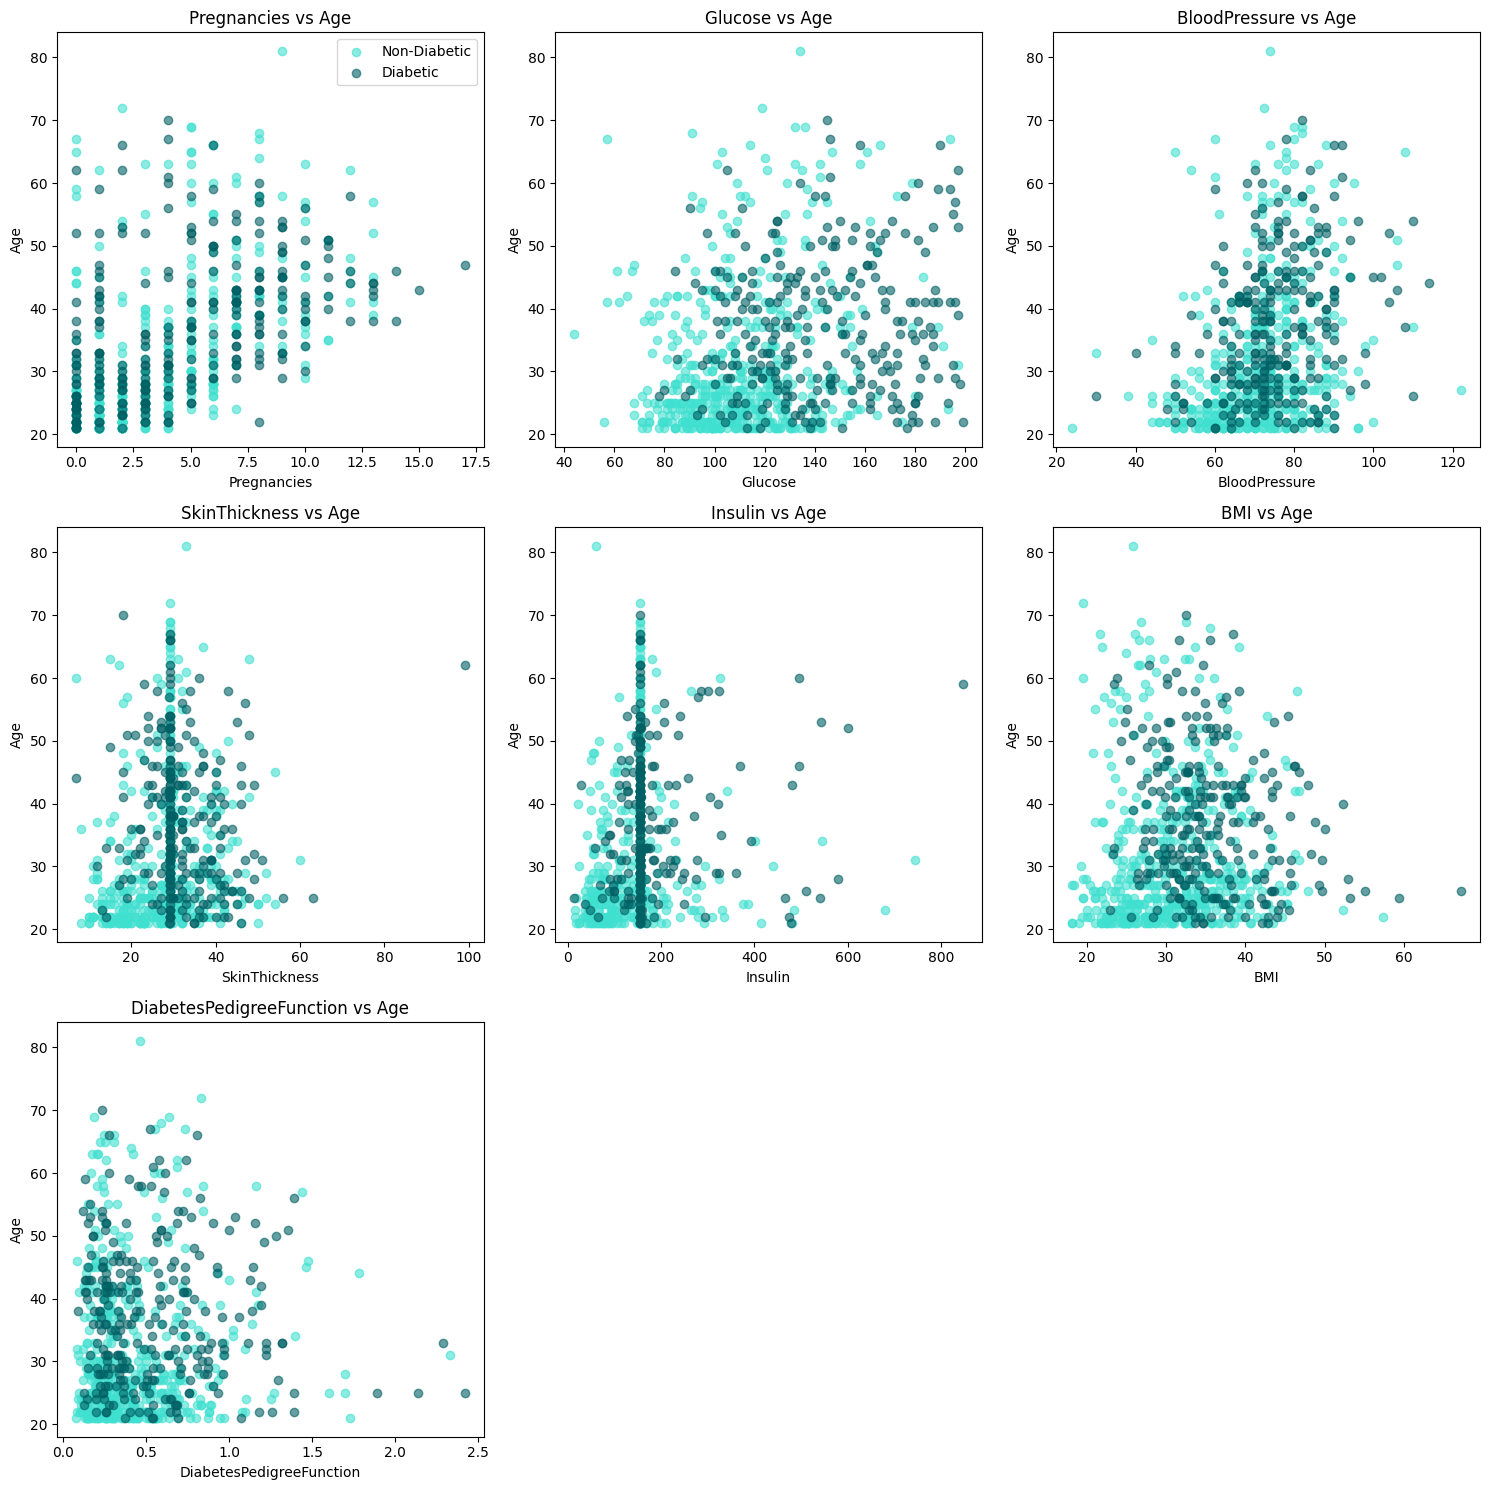

In [14]:
labels = ['Non-Diabetic', 'Diabetic']
scatter_plots_grid_by_feature_and_split(df_diabetes, ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction'], 'Outcome', 'Age', labels)


Con los resultados obtenidos, se muestra que las mujeresd diabéticas tienden a estar entre los valores más bajos en cuantos a edad. Los datos están más concentrados en las edades bajas en todos los *features* sólo en algunos casos como los embarazos o nuevamente la prsión sanguíonea tienen más disperción de datos.

#### **Remover outliers**

Los outliers son valores que difieren significativamente del resto de los datos. Pueden ser el resultado de errores de medición, variabilidad en la medición o incluso variaciones naturales en la población. Estos podrían ser valores extremadamente altos o bajos en las características como la glucosa, presión arterial, grosor de la piel, entre otros, que no se alinean con el rango esperado de estos parámetros.

Original DataFrame size: (768, 9)
New DataFrame without outliers size: (515, 9)


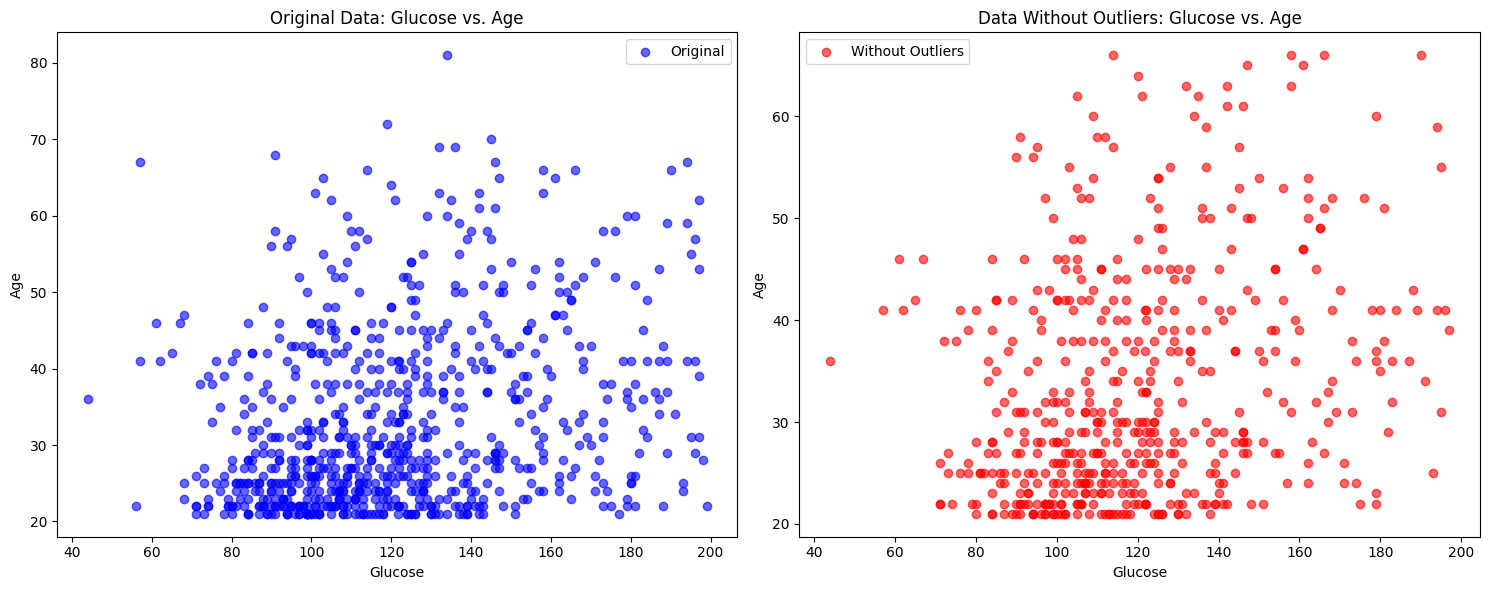

In [30]:
# Identify and remove outliers
Q1 = df_diabetes.quantile(0.25)
Q3 = df_diabetes.quantile(0.75)
IQR = Q3 - Q1

# Define criteria to identify a data point as an outlier
is_outlier = (df_diabetes < (Q1 - 1.5 * IQR)) | (df_diabetes > (Q3 + 1.5 * IQR))

# Apply criteria to numeric columns only, excluding 'Outcome'
is_outlier = is_outlier.drop(columns='Outcome')

# Filter the DataFrame to exclude outliers
df_no_outliers = df_diabetes[~(is_outlier).any(axis=1)]

print(f"Original DataFrame size: {df_diabetes.shape}")
print(f"New DataFrame without outliers size: {df_no_outliers.shape}")

# Define the figure and axes for two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Scatter plot for the original data
axes[0].scatter(df_diabetes['Glucose'], df_diabetes['Age'], alpha=0.6, color='#046266', label='Original')
axes[0].set_title('Original Data: Glucose vs. Age')
axes[0].set_xlabel('Glucose')
axes[0].set_ylabel('Age')
axes[0].legend()

# Scatter plot for the data without outliers
axes[1].scatter(df_no_outliers['Glucose'], df_no_outliers['Age'], alpha=0.6, color='red', label='Without Outliers')
axes[1].set_title('Data Without Outliers: Glucose vs. Age')
axes[1].set_xlabel('Glucose')
axes[1].set_ylabel('Age')
axes[1].legend()

plt.tight_layout()
plt.show()





Observando los cambios anteriores se puede evidenciar que: 
- <div style="display: inline-block; width: 12px; height: 12px; background-color: #CCCCFF; border: 1px solid black;"></div> dataset original, presenta mayor dispersión de datos en comparación al <div style="display: inline-block; width: 12px; height: 12px; background-color: #CC5184; border: 1px solid black;"></div> nuevo dataset (sin outliers), por lo que esto nos proporciana diferentes datas para realizar pruebas.


### Preprocesamiento de datos
En esta sección se procede a realizar el preprocesamiento de datos para el dataset *Pima Indians Diabetes Database*. Que consiste en separar el set de datos en training (80%) y testing (20%).

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

random_seed = 42
# Preparar el DataFrame eliminando la columna 'Pregnancies' si aún no se ha eliminado
df_diabetes_no_outliers_removed = df_diabetes.drop('Pregnancies', axis=1, errors='ignore')

# Separar las características y la etiqueta
X_no_outliers_removed = df_diabetes_no_outliers_removed.drop('Outcome', axis=1)
y_no_outliers_removed = df_diabetes_no_outliers_removed['Outcome']

# Dividir en conjunto de entrenamiento y prueba
X_train_no_outliers_removed, X_test_no_outliers_removed, y_train_no_outliers_removed, y_test_no_outliers_removed = train_test_split(X_no_outliers_removed, y_no_outliers_removed, test_size=0.2, random_state=random_seed)

# Estandarización de los datos (opcional, dependiendo de si deseas estandarizar)
scaler = StandardScaler()
X_train_no_outliers_removed_scaled = scaler.fit_transform(X_train_no_outliers_removed)
X_test_no_outliers_removed_scaled = scaler.transform(X_test_no_outliers_removed)

# Entrenar el modelo KNN
knn = KNeighborsClassifier()
knn.fit(X_train_no_outliers_removed_scaled, y_train_no_outliers_removed)

# Hacer predicciones
predictions = knn.predict(X_test_no_outliers_removed_scaled)

# Calcular y mostrar las métricas
accuracy = accuracy_score(y_test_no_outliers_removed, predictions)
precision = precision_score(y_test_no_outliers_removed, predictions)
recall = recall_score(y_test_no_outliers_removed, predictions)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")


NameError: name 'random_seed' is not defined

In [15]:
df_diabetes = df_diabetes.drop('Pregnancies', axis=1)

In [17]:
import numpy as np
from scipy import stats
# Calculamos el puntaje Z (la desviación en términos de desviación estándar)
z_scores = np.abs(stats.zscore(df_diabetes))

# Establecemos un umbral para identificar los outliers
threshold = 3

# Obtenemos un arreglo booleano de donde los puntajes Z están fuera del umbral
outliers = (z_scores > threshold).any(axis=1)

# Filtramos los outliers de nuestro DataFrame
df_filtered = df_diabetes[~outliers]

# Ahora podrías separar tu conjunto de datos ya filtrado.
X = df_filtered.drop(['Outcome', ], axis=1)
y = df_filtered['Outcome']

# Spliteado

## Standarizacion

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Separar características y etiqueta
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_seed)

# Estandarización
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Entrenar el modelo KNN
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)

# Hacer predicciones
predictions = knn.predict(X_test_scaled)

# Calcular y mostrar las métricas
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")


NameError: name 'X' is not defined

## normalizacion

In [20]:
from sklearn.preprocessing import MinMaxScaler

# Normalización
scaler = MinMaxScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

# Entrenar el modelo KNN con datos normalizados
knn.fit(X_train_normalized, y_train)

# Hacer predicciones
predictions = knn.predict(X_test_normalized)

# Calcular y mostrar las métricas
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")


Accuracy: 0.7793103448275862
Precision: 0.58
Recall: 0.725


## SMOTE